In [ ]:
pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 KB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import praw
import datetime as dt
import matplotlib.pyplot as plt
import re

# Authenticate with Reddit API
reddit = praw.Reddit(client_id='p9GRfbcgzxqNtw-Z88DaBA',
                     client_secret='fkDasz4L_yEQ9kwLodmL7yX1L1qMFw',
                     user_agent='scraper',
                     check_for_async=False)

# Create subreddit objects for r/emergencymedicine and r/medicine
em_subreddit = reddit.subreddit('emergencymedicine')
med_subreddit = reddit.subreddit('medicine')

# Define a function to extract the data from a subreddit and return a pandas dataframe
def extract_data(subreddit):
    # Get the 10000 most recent posts on the subreddit
    new_posts = subreddit.new(limit=10000)

    # Create empty lists to store the data
    titles = []
    contents = []
    dates = []

    # Loop through the posts and extract the data
    for post in new_posts:
        titles.append(post.title)
        contents.append(post.selftext)
        dates.append(dt.datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'))

    # Create a dictionary to store the data
    data = {'Title': titles, 'Content': contents, 'Date': dates}

    # Create a pandas dataframe from the dictionary
    df = pd.DataFrame(data)

    # Convert the 'Date' column to datetime type
    df['Date'] = pd.to_datetime(df['Date'])

    # Add a column to count the number of mentions of 'burnout' in the title or content of each post
    df['Burnout Mentions'] = df['Title'].str.count('burnout', flags=re.IGNORECASE) + df['Content'].str.count('burnout', flags=re.IGNORECASE)

    # Add a column to count the number of mentions of 'stress' in the title or content of each post
    df['Stress Mentions'] = df['Title'].str.count('stress', flags=re.IGNORECASE) + df['Content'].str.count('stress', flags=re.IGNORECASE)


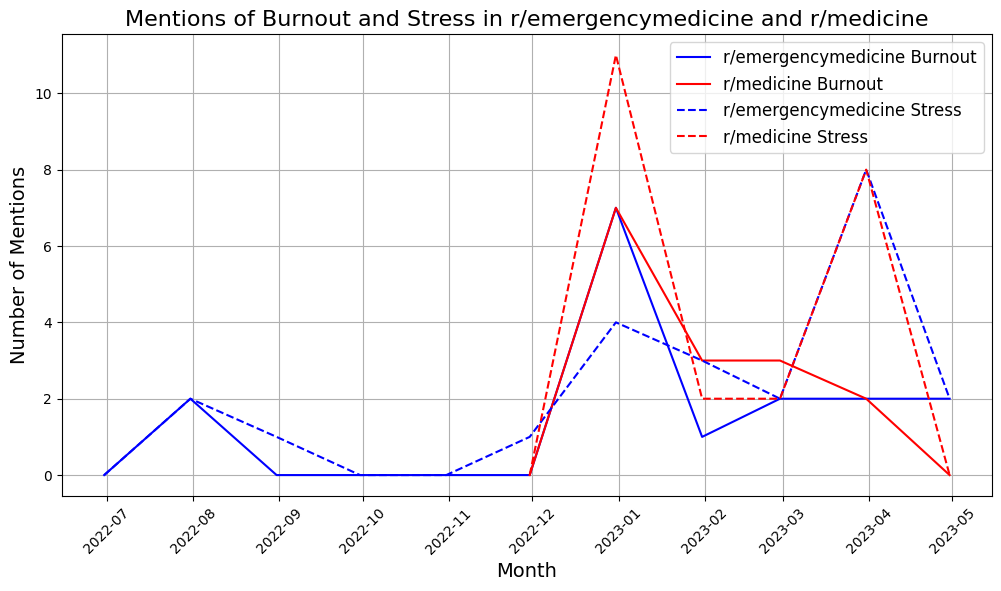

In [74]:
# Set line styles and colors for each subreddit
em_burnout_style = 'b-' # blue solid line
em_stress_style = 'b--' # blue dashed line
med_burnout_style = 'r-' # red solid line
med_stress_style = 'r--' # red dashed line

# Create a new figure with a larger size
plt.figure(figsize=(12, 6))

# Plot the burnout mentions for each subreddit
plt.plot(em_data.index, em_data['Burnout Mentions'], em_burnout_style, label='r/emergencymedicine Burnout')
plt.plot(med_data.index, med_data['Burnout Mentions'], med_burnout_style, label='r/medicine Burnout')

# Plot the stress mentions for each subreddit
plt.plot(em_data.index, em_data['Stress Mentions'], em_stress_style, label='r/emergencymedicine Stress')
plt.plot(med_data.index, med_data['Stress Mentions'], med_stress_style, label='r/medicine Stress')

# Add grid lines to the graph
plt.grid()

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Add annotations to highlight interesting trends or patterns
plt.annotate('Peak in r/emergencymedicine\nBurnout mentions in June 2022', xy=(pd.Timestamp('2022-06-30'), 200),
             xytext=(pd.Timestamp('2022-07-30'), 500),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Set the title and axis labels
plt.title('Mentions of Burnout and Stress in r/emergencymedicine and r/medicine', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Mentions', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Authenticate with Reddit API
#reddit = praw.Reddit(client_id='p9GRfbcgzxqNtw-Z88DaBA',
#                     client_secret='fkDasz4L_yEQ9kwLodmL7yX1L1qMFw',
#                     user_agent='scraper',
#                     check_for_async=False)